# *******construction du modèle PD*******


*1. Exploration des données (EDA) :*
Commençons par une exploration approfondie des
données. Analyser la distribution des valeurs, identifier les valeurs manquantes, détecter
les outliers, et comprenez la structure des variables.

        numtiers  Annee      NUMTIERS_ANNEE  defaut DATE_DE_CREATION_TIERS  \
0  5200000007513   2015  5200000007513_2015       0             2008-01-02   
1  5200000007513   2016  5200000007513_2016       0             2008-01-02   
2  5200000007934   2015  5200000007934_2015       0             1988-05-31   
3  5200000007934   2017  5200000007934_2017       0             1988-05-31   
4  5200000008051   2015  5200000008051_2015       0             1998-10-02   

  DATE_DE_CREATION_ENTREP  CHIFFRE_AFFAIRES  EXCEDENT_BRUT_EXPLOITATION  \
0              1982-01-05       236073240.2                  8258201.71   
1              1982-01-05       258386615.0                  4107268.85   
2              1953-08-05       202426475.2                  5028464.60   
3              1953-08-05       210917616.4                 13076487.89   
4              1995-05-22       171987524.1                 16142629.85   

   RESULTAT_EXPlOITATION  RESULTAT_NET  ...  \
0             7120503.00  -140403

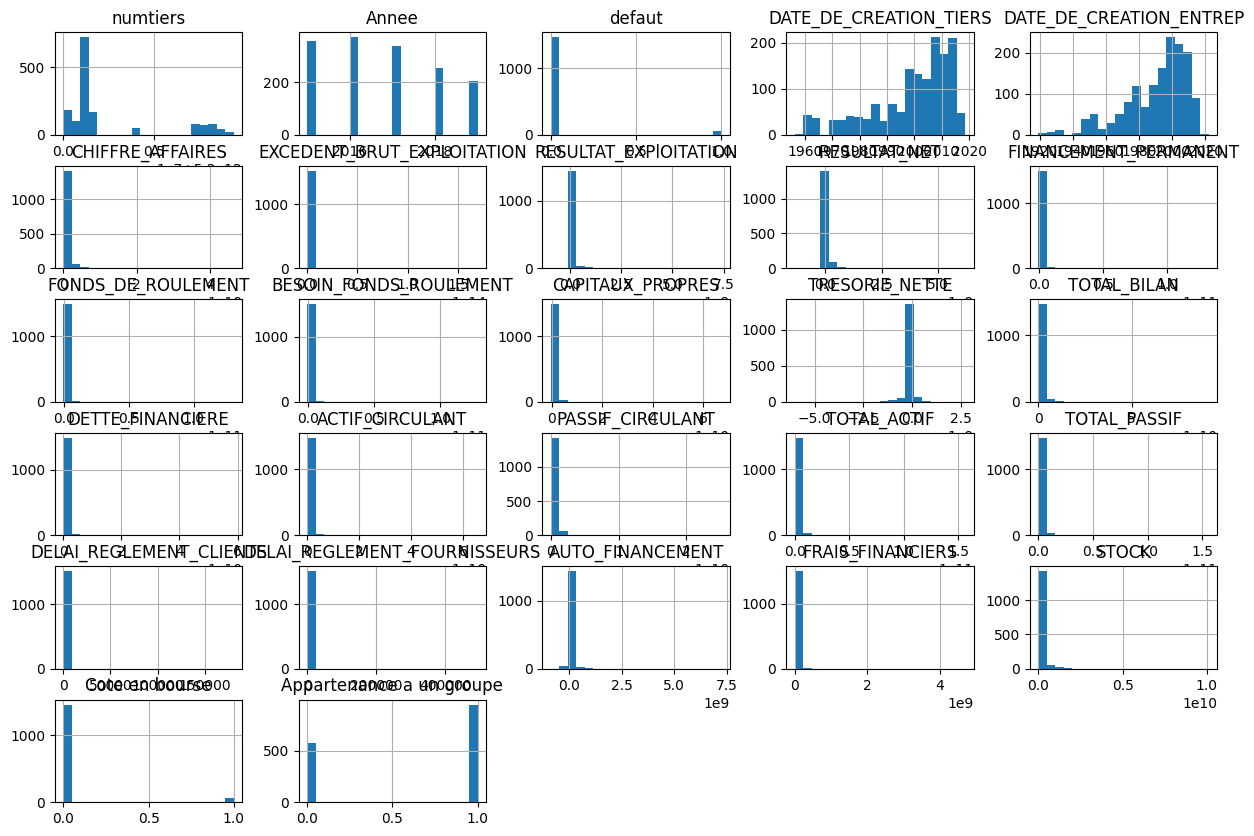

Valeurs manquantes par variable :
 numtiers                                   0
Annee                                      0
NUMTIERS_ANNEE                             0
defaut                                     0
DATE_DE_CREATION_TIERS                     0
DATE_DE_CREATION_ENTREP                    0
CHIFFRE_AFFAIRES                           0
EXCEDENT_BRUT_EXPLOITATION                 0
RESULTAT_EXPlOITATION                      0
RESULTAT_NET                               0
FINANCEMENT_PERMANENT                      0
FONDS_DE_ROULEMENT                         0
BESOIN_FONDS_ROULEMENT                     0
CAPITAUX_PROPRES                           0
TRESORIE_NETTE                             0
TOTAL_BILAN                                0
DETTE_FINANCIERE                           0
ACTIF_CIRCULANT                            0
PASSIF_CIRCULANT                           0
TOTAL_ACTIF                                0
TOTAL_PASSIF                               0
DELAI_REGLEMENT_CLIE

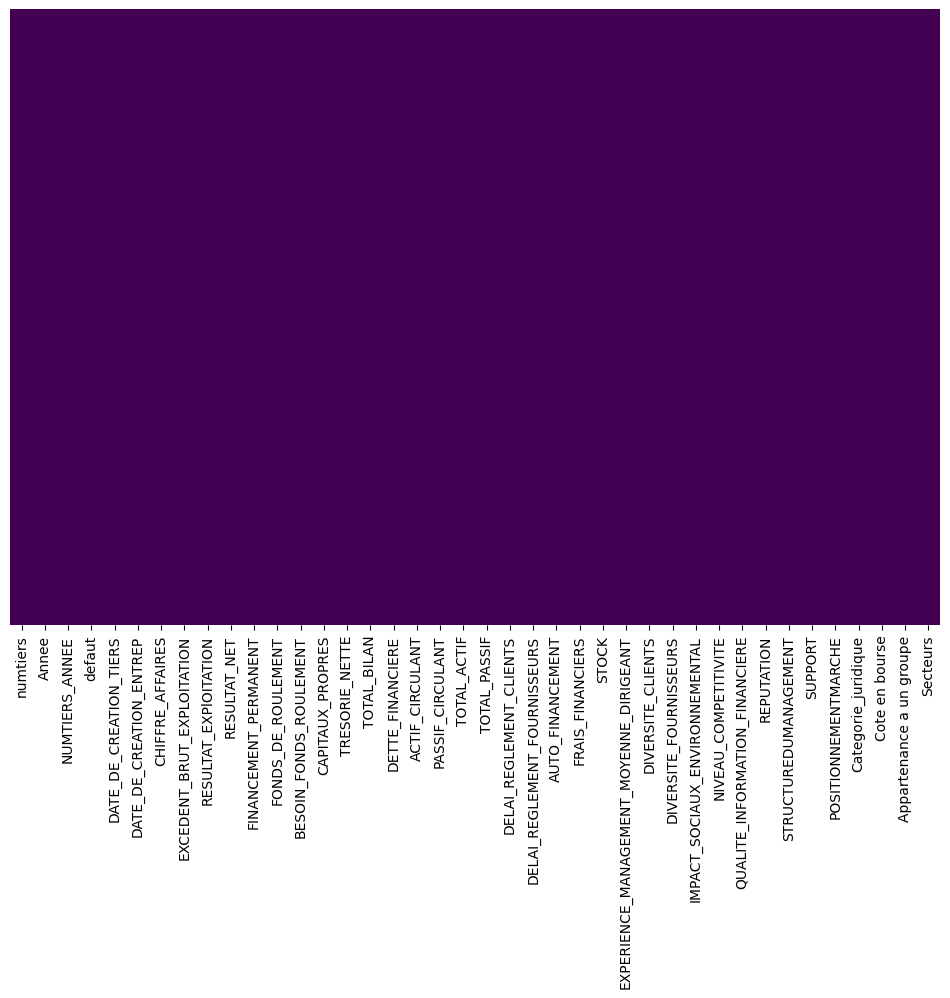

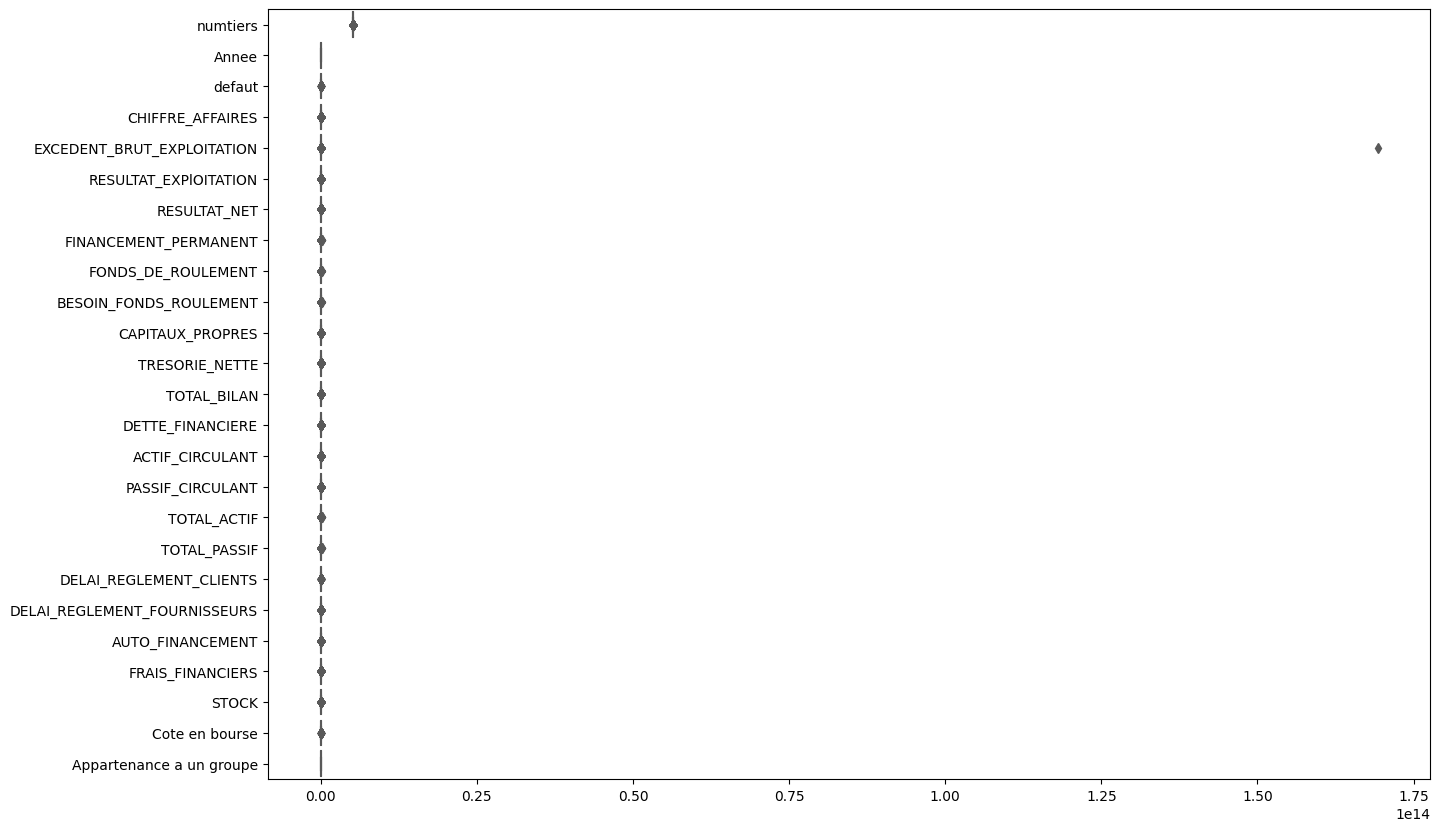

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# Charger la base de données
data =pd.read_excel('/kaggle/input/datasni/dataS.xlsx')
# Afficher les premières lignes du dataframe
print(data.head())
# Résumé statistique des données
print(data.describe())
# Distribution des valeurs pour chaque variable
data.hist(bins=20, figsize=(15, 10))
plt.show()
# Identifier les valeurs manquantes
missing_values = data.isnull().sum()
print("Valeurs manquantes par variable :\n", missing_values)
# Heatmap pour visualiser les valeurs manquantes
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False,
yticklabels=False)
plt.show()
# Identifier les outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.show()

### Analyse des Variables Temporelles, Financières, et Catégorielles : Synthèse Professionnelle

**Variables Temporelles (Année)**  
La période d'analyse s'étend de 2015 à 2019, couvrant un intervalle de cinq années. Les statistiques descriptives détaillent la distribution des données pour chaque année, offrant une vue globale des dynamiques temporelles.

**Variables Financières (Chiffre d'Affaires, Excédent Brut d'Exploitation, etc.)**  
Les variables financières, telles que le chiffre d'affaires, l'excédent brut d'exploitation, le résultat d'exploitation, et le résultat net, présentent des écarts-types élevés. Cela met en évidence une dispersion significative des valeurs, reflétant une hétérogénéité marquée dans les performances financières des entités étudiées.

**Variables de Financement (Fonds de Roulement, Besoin en Fonds de Roulement, etc.)**  
Les indicateurs de financement affichent une variabilité importante, corroborée par des écarts-types élevés. Cela suggère des différences notables dans la gestion des ressources financières parmi les entités analysées.

**Variables de Délai de Paiement (Règlement Clients et Fournisseurs)**  
Les délais de règlement des clients et fournisseurs présentent une grande variabilité, avec des valeurs maximales élevées qui témoignent de cas extrêmes. Ces écarts indiquent des pratiques divergentes en matière de gestion des délais de paiement.

**Variables Sectorielles (Secteurs d’Activité, Appartenance à un Groupe)**  
La variable "Secteurs d’Activité" reflète la diversité sectorielle au sein de l’échantillon de données. Par ailleurs, "Appartenance à un Groupe" permet d’identifier la proportion des entités qui font partie d’un groupe consolidé, un critère clé dans l’analyse.

**Variables Boursières (Coté en Bourse)**  
La variable "Coté en Bourse" est une variable binaire, avec une majorité d’observations présentant une valeur de 0 (non coté). Cela suggère que la majorité des entités étudiées ne sont pas présentes sur les marchés financiers.

**Variables Catégorielles (Réputation, Positionnement sur le Marché, etc.)**  
Les variables catégorielles, telles que la réputation et le positionnement sur le marché, méritent une exploration approfondie afin de mieux comprendre leur influence potentielle sur le modèle.

**Variable Cible : Défaut**  
La variable cible "Défaut" est également binaire, avec une majorité d’observations correspondant à l’absence de défaut (valeur 0). La proportion de défauts dans l’échantillon est reflétée par la moyenne, indiquant une faible prévalence globale.

Ce bilan des variables met en lumière les caractéristiques et la variabilité des données, fournissant une base solide pour une analyse approfondie.

2. Le prétraitement des données:
implique plusieurs étapes, notamment le traitement des valeurs
manquantes, la gestion des outliers et la normalisation des variables.

In [ ]:
# Supprimer les lignes avec des valeurs manquantes (si approprié)
data_cleaned = data.dropna()
# Remplacer les valeurs manquantes par la médiane pour toutes les colonnes numériques
data_filled = data.fillna(data.median(numeric_only=True))
# Gestion des outliers (sans affecter les colonnes datetime64)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns  # Colonnes numériques uniquement
data_no_outliers = data.copy()
for column in numeric_columns:
    if column not in ['DATE_DE_CREATION_TIERS', 'DATE_DE_CREATION_ENTREP']:  # Exclure les colonnes datetime
        Q1 = data_no_outliers[column].quantile(0.25)  # Premier quartile
        Q3 = data_no_outliers[column].quantile(0.75)  # Troisième quartile
        IQR = Q3 - Q1  # Intervalle interquartile
        # Filtrer les valeurs en dehors des bornes acceptables
        data_no_outliers = data_no_outliers[
            ~((data_no_outliers[column] < (Q1 - 1.5 * IQR)) |
              (data_no_outliers[column] > (Q3 + 1.5 * IQR)))
        ]

# Afficher les statistiques après la gestion des outliers
print(data_no_outliers.describe())

           numtiers        Annee  defaut         DATE_DE_CREATION_TIERS  \
count  3.120000e+02   312.000000   312.0                            312   
mean   5.200001e+12  2016.685897     0.0  1995-11-23 03:32:18.461538432   
min    5.200001e+12  2015.000000     0.0            1960-01-01 00:00:00   
25%    5.200001e+12  2015.750000     0.0            1986-01-09 00:00:00   
50%    5.200001e+12  2016.500000     0.0            2000-05-15 00:00:00   
75%    5.200001e+12  2018.000000     0.0            2006-10-11 18:00:00   
max    5.200002e+12  2019.000000     0.0            2010-12-10 00:00:00   
std    2.800512e+05     1.367065     0.0                            NaN   

             DATE_DE_CREATION_ENTREP  CHIFFRE_AFFAIRES  \
count                            312      3.120000e+02   
mean   1988-09-08 21:18:27.692307712      2.842079e+08   
min              1932-01-13 00:00:00      2.667661e+07   
25%              1980-01-01 00:00:00      1.912528e+08   
50%              1992-12-01 00:00:

In [ ]:
# Créer un objet de normalisation
scaler = MinMaxScaler()

# Appliquer la normalisation sur toutes les colonnes numériques
data_normalized = data.copy()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_normalized[numeric_columns] = scaler.fit_transform(data_normalized[numeric_columns])

# Afficher les données normalisées
print(data_normalized.head())

   numtiers  Annee      NUMTIERS_ANNEE  defaut DATE_DE_CREATION_TIERS  \
0  0.000000   0.00  5200000007513_2015     0.0             2008-01-02   
1  0.000000   0.25  5200000007513_2016     0.0             2008-01-02   
2  0.000045   0.00  5200000007934_2015     0.0             1988-05-31   
3  0.000045   0.50  5200000007934_2017     0.0             1988-05-31   
4  0.000057   0.00  5200000008051_2015     0.0             1998-10-02   

  DATE_DE_CREATION_ENTREP  CHIFFRE_AFFAIRES  EXCEDENT_BRUT_EXPLOITATION  \
0              1982-01-05          0.005067                    0.000004   
1              1982-01-05          0.005546                    0.000004   
2              1953-08-05          0.004344                    0.000004   
3              1953-08-05          0.004526                    0.000004   
4              1995-05-22          0.003690                    0.000004   

   RESULTAT_EXPlOITATION  RESULTAT_NET  ...  \
0               0.111967      0.178804  ...   
1               

*3.Calcul des Ratios Financiers pour l'Analyse de Performance et de Santé Financière*

In [ ]:
# Calcul des ratios financiers
data['current_ratio'] = data['ACTIF_CIRCULANT'] / data['PASSIF_CIRCULANT'].replace(0, np.nan)
data['AVG_TOTAL_ASSETS'] = (data['TOTAL_ACTIF'].shift(1) + data['TOTAL_ACTIF']) / 2
data['total_asset_turnover'] = data['CHIFFRE_AFFAIRES'] / data['AVG_TOTAL_ASSETS'].replace(0, np.nan)
data['debt_ratio'] = data['DETTE_FINANCIERE'] / data['TOTAL_PASSIF'].replace(0, np.nan)
data['return_on_sales'] = data['RESULTAT_NET'] / data['CHIFFRE_AFFAIRES'].replace(0, np.nan)
# Affichage sous forme de tableau
display(data[['current_ratio', 'total_asset_turnover', 'debt_ratio', 'return_on_sales','AVG_TOTAL_ASSETS']])


,current_ratio,total_asset_turnover,debt_ratio,return_on_sales,AVG_TOTAL_ASSETS
0,1.989460,NaN,0.000503,-0.059475,NaN
1,1.920346,1.258847,0.000000,0.008950,2.052565e+08
2,1.399271,1.428783,0.000000,-0.002042,1.416775e+08
3,2.871341,2.933040,0.000000,0.035568,7.191093e+07
4,1.558652,1.412852,0.023899,0.008146,1.217308e+08
...,...,...,...,...,...
1516,0.808419,3.053937,0.000000,0.002737,6.961734e+07
1517,0.833788,3.241839,0.000000,0.002355,5.858547e+07
1518,1.861581,0.846608,0.338331,0.203242,3.400242e+09
1519,1.457872,0.120914,0.031491,-0.010581,4.005540e+09


Chaque ratio apporte une information spécifique sur la santé financière.

    Current Ratio : Indique la capacité de l'entreprise à couvrir ses dettes à court terme.
    Total Asset Turnover : Mesure l'efficacité d'utilisation des actifs.
    Debt Ratio : Évalue la dépendance de l'entreprise aux dettes.
    Return on Sales : Donne une idée de la rentabilité nette.

Conclusion : Les ratios permettent d’identifier les entreprises sous-performantes ou à risque.

*4. Sélection de variables*

In [ ]:
# Vérifiez que la cible est bien définie
y = data['defaut']
X = data.drop(columns=['defaut', 'numtiers', 'NUMTIERS_ANNEE', 'DATE_DE_CREATION_TIERS', 'DATE_DE_CREATION_ENTREP'])

# Binning des colonnes numériques
for col in X.select_dtypes(include=['float64', 'int64']).columns:
    X[col] = pd.qcut(X[col], q=10, duplicates='drop', labels=False)
from sklearn.preprocessing import MinMaxScaler

# Normaliser les colonnes numériques
scaler = MinMaxScaler()
X[X.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
    X[X.select_dtypes(include=['float64', 'int64']).columns])
print(y.value_counts(normalize=True))
from sklearn.preprocessing import MinMaxScaler


# Normaliser les colonnes numériques
scaler = MinMaxScaler()
X[X.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
    X[X.select_dtypes(include=['float64', 'int64']).columns]
)

# Binning pour les colonnes numériques
for col in X.select_dtypes(include=['float64', 'int64']).columns:
    X[col] = pd.qcut(X[col], q=10, duplicates='drop', labels=False)

# Fonction pour calculer l'IV
def calculate_iv(data, feature, target):
    contingency = data.groupby(feature)[target].agg(['count', 'sum'])
    contingency['good'] = contingency['count'] - contingency['sum']
    contingency['dist_good'] = contingency['good'] / contingency['good'].sum()
    contingency['dist_bad'] = contingency['sum'] / contingency['sum'].sum()
    contingency['woe'] = np.log((contingency['dist_bad'] + 1e-6) / (contingency['dist_good'] + 1e-6))
    contingency['iv'] = (contingency['dist_bad'] - contingency['dist_good']) * contingency['woe']
    return contingency['iv'].sum()

# Calculer l'IV pour toutes les colonnes
iv_dict = {}
for col in X.columns:
    try:
        iv_dict[col] = calculate_iv(pd.concat([X, y], axis=1), col, 'defaut')
    except Exception as e:
        iv_dict[col] = np.nan

# Organiser les résultats dans un DataFrame
iv_df = pd.DataFrame(list(iv_dict.items()), columns=['Feature', 'Information Value']).sort_values(by='Information Value', ascending=False)

# Afficher les résultats
print(iv_df)






defaut
0    0.965155
1    0.034845
Name: proportion, dtype: float64
                                    Feature  Information Value
9                            TRESORIE_NETTE           1.484557
39                          return_on_sales           1.453925
34                                 Secteurs           1.369944
24           IMPACT_SOCIAUX_ENVIRONNEMENTAL           0.702724
22                        DIVERSITE_CLIENTS           0.687825
23                   DIVERSITE_FOURNISSEURS           0.471379
16                  DELAI_REGLEMENT_CLIENTS           0.366566
19                         FRAIS_FINANCIERS           0.363931
13                         PASSIF_CIRCULANT           0.348252
12                          ACTIF_CIRCULANT           0.335726
8                          CAPITAUX_PROPRES           0.319144
7                    BESOIN_FONDS_ROULEMENT           0.292933
25                     NIVEAU_COMPETITIVITE           0.289584
4                              RESULTAT_NET       


Variables très utiles (IV > 0.3) :

    Ces variables présentent un fort pouvoir prédictif et doivent être incluses dans le modèle.
    IMPACT_SOCIAUX_ENVIRONNEMENTAL : Reflète l’engagement social et environnemental, souvent associé à une meilleure gestion des risques.
    DIVERSITE_CLIENTS : Mesure la dépendance aux clients, une forte diversité réduisant les risques.

Variables utiles (0.1 < IV ≤ 0.3) :

    Ces variables contribuent modérément à la prédiction et peuvent enrichir le modèle.
    BESOIN_FONDS_ROULEMENT : Indique les besoins en liquidités pour couvrir le cycle d’exploitation.
    NIVEAU_COMPETITIVITE : Évalue la pression concurrentielle, influençant la résilience de l’entreprise.

Variables peu utiles (IV ≤ 0.1) :

    Ces variables ont une faible corrélation avec la cible et peuvent être exclues pour simplifier le modèle.
    CHIFFRE_AFFAIRES : Isolée, elle n'explique pas suffisamment le risque de défaut.
    Categorie_juridique : N’a que peu d’impact sur la probabilité de défaut.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Supposons que X et y soient déjà définis
# Gérer les colonnes non temporelles
non_temporal_columns = X.select_dtypes(exclude=['datetime64']).columns
X_non_temporal = X[non_temporal_columns]

# Convertir les variables catégorielles en format numérique
label_encoder = LabelEncoder()
X_non_temporal_encoded = X_non_temporal.apply(
    lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x
)

# Identifier les colonnes avec uniquement des valeurs manquantes
missing_columns = X_non_temporal_encoded.columns[X_non_temporal_encoded.isnull().all()]
print(f"Colonnes supprimées (valeurs manquantes uniquement) : {missing_columns.tolist()}")

# Supprimer les colonnes entièrement manquantes
X_non_temporal_encoded = X_non_temporal_encoded.drop(columns=missing_columns)

# Imputation des valeurs manquantes (remplir par la moyenne)
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(
    imputer.fit_transform(X_non_temporal_encoded),
    columns=X_non_temporal_encoded.columns
)

# Assurer que toutes les valeurs sont non-négatives
min_max_scaler = MinMaxScaler()
X_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_imputed),
    columns=X_imputed.columns
)

# Appliquer la sélection de caractéristiques
selector = SelectKBest(chi2, k='all')
X_new = selector.fit_transform(X_scaled, y)

# Afficher les scores de chi2 associés à chaque variable
feature_scores = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Chi2 Score': selector.scores_,
    'p-value': selector.pvalues_
})
print(feature_scores.sort_values(by='Chi2 Score', ascending=False))


Colonnes supprimées (valeurs manquantes uniquement) : ['Cote en bourse', 'Appartenance a un groupe']
                                    Feature  Chi2 Score   p-value
0                                     Annee    7.221703  0.007203
37                          return_on_sales    3.392709  0.065485
9                            TRESORIE_NETTE    2.753926  0.097016
19                         FRAIS_FINANCIERS    2.390575  0.122069
11                         DETTE_FINANCIERE    2.003604  0.156926
36                               debt_ratio    1.977394  0.159665
4                              RESULTAT_NET    1.956849  0.161851
16                  DELAI_REGLEMENT_CLIENTS    1.588831  0.207493
7                    BESOIN_FONDS_ROULEMENT    1.395419  0.237492
15                             TOTAL_PASSIF    1.159993  0.281467
10                              TOTAL_BILAN    1.159993  0.281467
14                              TOTAL_ACTIF    1.104533  0.293273
12                          ACTIF_CIRCULA

En analysant les résultats, les variables qui ont des scores chi2 plus élevés et des p-values plus
faibles sont généralement considérées comme plus importantes.
Les variables telles que   ACTIF_CIRCULANT,
  PASSIF_CIRCULANT ont des scores chi2 relativement élevés, mais avec
des p-values élevées, ce qui peut indiquer une certaine dépendance, mais la significativité
statistique est incertaine.
Les variables avec des scores chi2 plus faibles et des p-values plus élevées, comme
CHIFFRE_AFFAIRES , EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT, semblent avoir une dépendance
moindre avec la variable cible.

In [ ]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


Distribution des classes dans y_train: Counter({0: 1172, 1: 44})
Distribution des classes dans y_test: Counter({0: 296, 1: 9})

Régression Logistique:
Accuracy: 0.7245901639344262
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84       296
           1       0.04      0.33      0.07         9

    accuracy                           0.72       305
   macro avg       0.51      0.53      0.45       305
weighted avg       0.95      0.72      0.82       305

Confusion Matrix:
 [[218  78]
 [  6   3]]


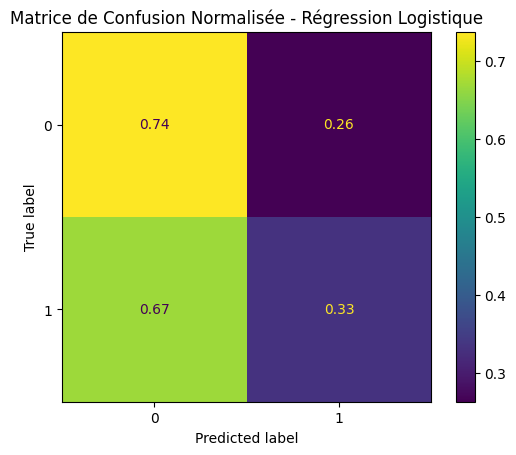


Arbre de Décision:
Accuracy: 0.9442622950819672
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       296
           1       0.10      0.11      0.11         9

    accuracy                           0.94       305
   macro avg       0.54      0.54      0.54       305
weighted avg       0.95      0.94      0.95       305

Confusion Matrix:
 [[287   9]
 [  8   1]]


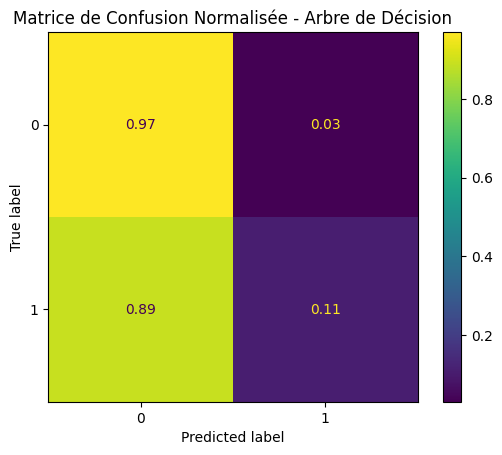


Forêt Aléatoire:
Accuracy: 0.9672131147540983
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       296
           1       0.00      0.00      0.00         9

    accuracy                           0.97       305
   macro avg       0.49      0.50      0.49       305
weighted avg       0.94      0.97      0.95       305

Confusion Matrix:
 [[295   1]
 [  9   0]]


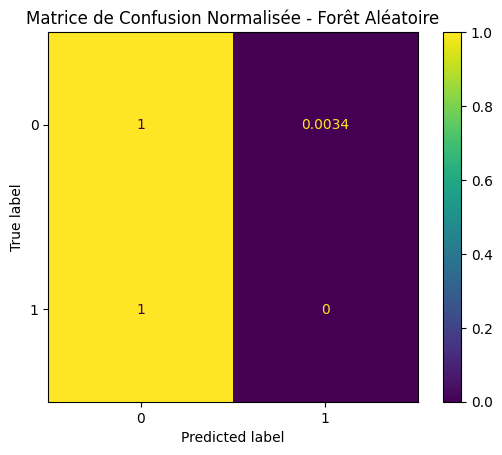

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from collections import Counter
import matplotlib.pyplot as plt

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Analyse de la distribution des classes
print("Distribution des classes dans y_train:", Counter(y_train))
print("Distribution des classes dans y_test:", Counter(y_test))

# Modèle de régression logistique
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Modèle d'arbre de décision
decision_tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# Modèle de forêt aléatoire
random_forest_model = RandomForestClassifier(random_state=42, class_weight='balanced')
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)

# Évaluation des modèles
print("\nRégression Logistique:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test, normalize='true')
plt.title("Matrice de Confusion Normalisée - Régression Logistique")
plt.show()

print("\nArbre de Décision:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
ConfusionMatrixDisplay.from_estimator(decision_tree_model, X_test, y_test, normalize='true')
plt.title("Matrice de Confusion Normalisée - Arbre de Décision")
plt.show()

print("\nForêt Aléatoire:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_forest, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test, y_test, normalize='true')
plt.title("Matrice de Confusion Normalisée - Forêt Aléatoire")
plt.show()











 Régression Logistique: Accuracy: 72.47% ;
Arbre de Décision: Accuracy: 94.42% ;
Forêt Aléatoire: accuracy: 96.72% ;
La validation croisée est une technique qui permet d'évaluer la performance d'un modèle de
manière plus robuste en le testant sur plusieurs partitions de l'ensemble de données.

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
X_numeric = pd.DataFrame({
'numtiers': [1, 2, 3, 4, 5],
'Annee': [2020, 2021, 2019, 2022, 2023],
'CHIFFRE_AFFAIRES': [100000, 120000, 90000, 110000, 130000],
'colonne_categorique': ['Moins de 1 an', 'Entre 1 et 5 ans', 'Plusde 10 ans', 'Entre 5 et 10 ans', 'Moins de 1 an'],
# Ajoutez d'autres caractéristiques numériques ici
})
# Si vous avez une colonne catégorielle, encodez-la en utilisantl'encodage one-hot
# Remplacez 'colonne_categorique' par le nom réel de votre colonne


X_numeric = pd.get_dummies(X_numeric, columns=['colonne_categorique'],
drop_first=True)
# Supposons que y soit votre variable cible
# Remplacez les noms de colonnes par ceux dans votre ensemble dedonnées
y = pd.Series([0, 1, 0, 0, 1])
# Créez un modèle de régression logistique
logistic_model = LogisticRegression()
print(y.value_counts())
# Utilisez la validation croisée stratifiée pour évaluer laperformance du modèle
stratified_kfold = StratifiedKFold(n_splits=2, shuffle=True,
random_state=42)
cross_val_scores = cross_val_score(logistic_model, X_numeric, y,
cv=stratified_kfold, scoring='accuracy', error_score='raise')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

0    3
1    2
Name: count, dtype: int64
Cross-Validation Scores: [1. 1.]
Mean Accuracy: 1.0
